## Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.binomial(1, 0.5) # number of trials, probability of each trial

0

In [4]:
np.random.binomial(1, 0.5, 10)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [5]:
np.random.binomial(1000, 0.5)/1000

0.522

In [8]:
chance_of_tornado = 0.01/100
np.random.binomial(1000000, chance_of_tornado)

94

In [10]:
chance_of_tornado = 0.01

torado_events = np.random.binomial(1, chance_of_tornado, 1000000)

two_days_in_a_row = 0
for j in range(1, len(torado_events)-1):
    if torado_events[j] == 1 and torado_events[j+1] == 1:
        two_days_in_a_row += 1
        
print(two_days_in_a_row)

97


In [11]:
np.random.uniform(0, 1)

0.2629822791486589

In [12]:
np.random.normal(0.75)

0.9666566165425162

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [13]:
distribution = np.random.normal(0.75, size = 1000)

np.sqrt(np.sum((np.mean(distribution) - distribution) ** 2)/len(distribution))

0.97805509532701

In [14]:
np.std(distribution)

0.97805509532701

In [15]:
import scipy.stats as stats

In [16]:
stats.kurtosis(distribution)

0.03863291853475603

In [17]:
stats.skew(distribution)

0.07158856585952424

In [25]:
chi_squared_df2 = np.random.chisquare(2, size = 10000) #Number of degrees of freedom = 2

stats.skew(chi_squared_df2)

2.0948001706488344

In [28]:
chi_squared_df5 = np.random.chisquare(100, size = 10000)

stats.skew(chi_squared_df5)

0.29333928500890877

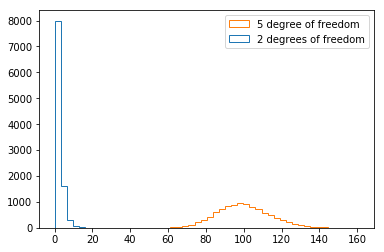

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2, chi_squared_df5],
                 bins = 50,
                 histtype = 'step',
                 label = ['2 degrees of freedom', '5 degree of freedom'])
plt.legend(loc = 'upper right')

## Hypothesis Testing

In [30]:
df = pd.read_csv('../Data src/grades.csv')

In [31]:
df.head(3)

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000


In [32]:
len(df)

2315

In [35]:
df.shape

(2315, 13)

In [36]:
early_df = df[df['assignment1_submission'] <= '2015-12-31']
late_df = df[df['assignment1_submission'] > '2015-12-31']

In [37]:
early_df.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [38]:
late_df.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

In [39]:
from scipy import stats
stats.ttest_ind?

In [40]:
stats.ttest_ind(early_df['assignment1_grade'], late_df['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [41]:
stats.ttest_ind(early_df['assignment2_grade'], late_df['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [42]:
stats.ttest_ind(early_df['assignment3_grade'], late_df['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.08710151634155668)